In [19]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
df=sns.load_dataset('mpg')

## mpg 컬럼 설명서
- 연비 mpg
- 실린더 cylinders
- 배기량 dispalcement
- 마력 horsepower
- 무게 weight 
- 제로백 acceleration

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 기존에 배웠던 
- 평균대치
- 선형보간
- sklearn iterative imputer를 사용해서 실제 결측값을 대체 후
- 해당 결측값을 대체한 것을 회귀분석을 통해 mse 차이가 어떤 식으로 나오는지 비교
- mse 오차에 대한 개념 예측한 값과 실제 값의 차이


- 선형보간의 경우는 결국 interpolation 기존에 데이터를 보고 결측을 메꾸는 방식
- 해당 방식이 과연 정말 데이터의 올바른 결측치 대체 방법인지 확인

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [5]:
df_x= df[['cylinders','displacement','horsepower','weight']]

In [13]:
## 결측치를 임의로 만듬
msv=np.random.randint(0,389, size=30) # np size 

In [14]:
df_x.iloc[msv] = np.nan

In [16]:
#결측치를 만들기
df_x.isna().sum()

cylinders       28
displacement    28
horsepower      34
weight          28
dtype: int64

In [53]:
df_sp =pd.concat([df_x ,df['mpg']],axis=1) # 결측치 만들고 y값과 붙이기
df_sp1 =pd.concat([df_x ,df['mpg']],axis=1)
df_sp2 =pd.concat([df_x ,df['mpg']],axis=1)
df_sp3 =pd.concat([df_x ,df['mpg']],axis=1)

<Axes: >

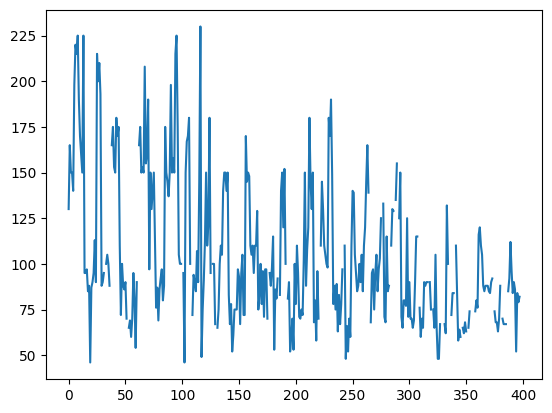

In [45]:
df_sp2.horsepower.plot()

### 평균으로 대체 
 
- cylinders       28
- displacement    28
- horsepower      34
- weight          28

In [25]:
df_x.cylinders.mean()

5.489189189189189

In [26]:
df_x.displacement.mean()

195.11756756756756

In [27]:
df_x.horsepower.mean()

105.16758241758242

In [28]:
df_x.weight.mean()

2983.2918918918917

In [30]:
# 결측치들 대체하기
df_sp1['cylinders'] = df_sp1['cylinders'].fillna(df_x.cylinders.mean())
df_sp1['displacement'] = df_sp1['displacement'].fillna(df_x.displacement.mean())
df_sp1['horsepower'] = df_sp1['horsepower'].fillna(df_x.horsepower.mean())
df_sp1['weight'] = df_sp1['weight'].fillna(df_x.weight.mean())

In [31]:
df_sp1.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [33]:
# 데이터 세트 분리 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp1.drop('mpg',axis=1), df_sp1['mpg'],test_size=0.3, random_state=111)

In [34]:
import statsmodels.api as sm #회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt # 시각화 모듈

In [35]:
fit_train1 = sm.OLS(y_train, x_train) # 회귀분석 진행하기 (다중회귀)

In [37]:
fit_train1 = fit_train1.fit() # 회귀분석 Fit 모델만들기

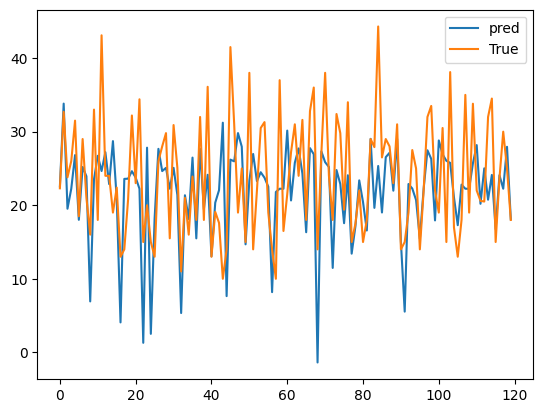

In [40]:
# 실제 예측
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)
# 평균을 가지고 대체해서 나온 회귀식 예측결과 실제값과 예측값의 mse 54.37 정도가 나옴

54.371370476301536


## 보간법을 이용하여 진행
- 선형보간법

In [46]:
df_sp2['cylinders'] = df_sp2['cylinders'].interpolate(method='linear')
df_sp2['displacement'] = df_sp2['displacement'].interpolate(method='linear')
df_sp2['horsepower'] = df_sp2['horsepower'].interpolate(method='linear')
df_sp2['weight'] = df_sp2['weight'].interpolate(method='linear')

In [47]:
df_sp2.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
mpg             0
dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('mpg',axis=1), df_sp2['mpg'],test_size=0.3, random_state=111)

In [49]:
fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()

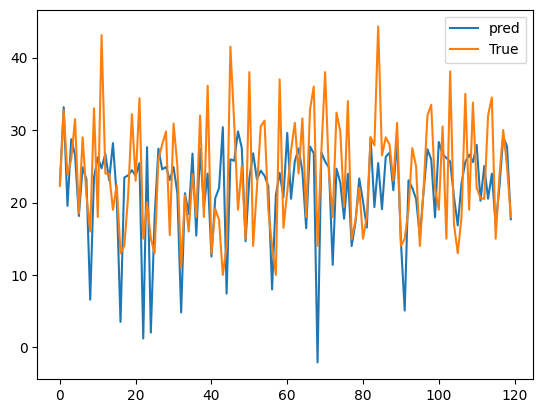

In [50]:
# 실제 예측
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)
# 선형보간을 진행하다보니 실제 평균으로 대치하는 것보다는 더 낮은 mse값이 나옴

52.7925061494177


### sklearn 패키지 중
- iterativeImputer
- sklearn 홈페이지에서 다른 하이퍼파라미터 참고

In [54]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

df_sp3 =imputer.fit_transform(df_sp3)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [55]:
# 반환값이 array 만들어짐
df_sp3

array([[   8.,  307.,  130., 3504.,   18.],
       [   8.,  350.,  165., 3693.,   15.],
       [   8.,  318.,  150., 3436.,   18.],
       ...,
       [   4.,  135.,   84., 2295.,   32.],
       [   4.,  120.,   79., 2625.,   28.],
       [   4.,  119.,   82., 2720.,   31.]])

In [56]:
#데이터프레임으로 변환
df_sp3= pd.DataFrame(df_sp3)

In [59]:
df_sp3.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [60]:
df_sp2.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'mpg'], dtype='object')

In [61]:
df_sp3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'mpg']

In [62]:
df_sp3

,cylinders,displacement,horsepower,weight,mpg
0,8.0,307.0,130.0,3504.0,18.0
1,8.0,350.0,165.0,3693.0,15.0
2,8.0,318.0,150.0,3436.0,18.0
3,8.0,304.0,150.0,3433.0,16.0
4,8.0,302.0,140.0,3449.0,17.0
...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,27.0
394,4.0,97.0,52.0,2130.0,44.0
395,4.0,135.0,84.0,2295.0,32.0
396,4.0,120.0,79.0,2625.0,28.0


In [63]:
x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('mpg',axis=1), df_sp3['mpg'],test_size=0.3, random_state=111)

In [64]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

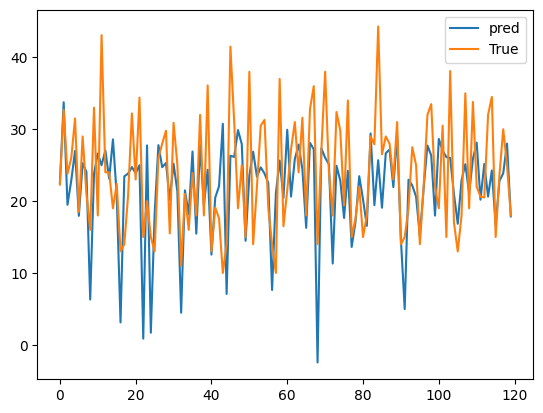

In [65]:
# 실제 예측
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

# 51.9514 mse

51.95140397025569


In [68]:
## 결측치를 대체하는 가장 좋은 방법 확인
print(mse1, '단순평균대치법')
print(mse2, '선형보간법')
print(mse3, 'iterative imputer')

54.371370476301536 단순평균대치법
52.7925061494177 선형보간법
51.95140397025569 iterative imputer


### 이 지표를 가지고 해석
- 모든 데이터를 이런 식으로 sklearn 대치만 하면 좋은지
- 단순하게 평균이나 선형보간이나 iterative 어떤 게 가장 좋다라고는 말할 수 없음
- 데이터의 관계나 데이터의 분포나, 더 나아가서는 앞단의 데이터에 대한 도메인 지식이 필수적으로 있어야 함

- 1.데이터 분석가가 도메인 지식없이 단순하게 수치로만 싸우게되면 결국 이런 수치만 보고 판단해서 가장 낮은 수치만을 좇고 또 한쪽으로만 치우치는 경향이 생김
- 2.데이터 분석가가 해석을 할 수 없으면 안됨

- 기존의 데이터의 분포와 데이터의 관계를 잘 이해하고 있어야 함

- 결측치를 대체하는 방법 자체가 위의 방법대로 진행을 한다면
- 해당 방법에 대한 로직은 정확히 이해를 해야함 
- 가장 중요한 건 결국 현재 데이터 분포에 대해서 정확히 이해를 해야함 
- 평균으로만 대체하는 것이 오히려 로직상으로 맞을 수도 있음. 서베이 데이터라고 하는데 무응답 데이터 같은 경우는 다른 데이터와 관계로 대체하는 게 아니라 무응답이기 때문에 그냥 0으로만 대체한다 도메인 로직을 알고 있어야 함.

- ## 결측치를 대체할 때
- 꼭 도메인에 대한 지식을 가지고 컬럼들 바라보고
- 각 컬럼들간의 데이터 분포와 특히 y값에 대한 분포들도 꼭 살펴보면서
- 어떤 결측치 대체 방법을 사용할지 고민하고 선정해야 함

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_70444/2276503915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement'])


<Axes: xlabel='displacement', ylabel='Density'>

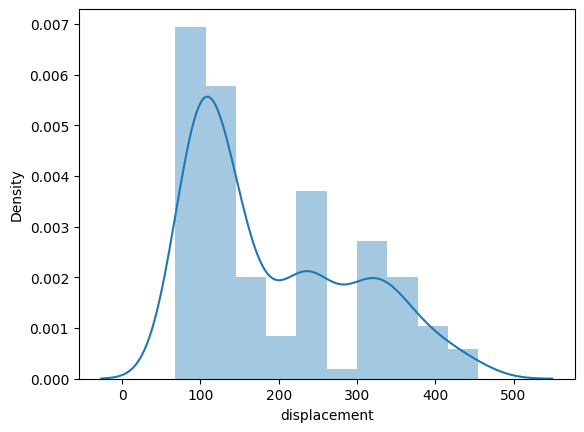

In [70]:
sns.distplot(df['displacement']) #간단한 분포 그래프 그리기 (sns distplot)

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_70444/3228217076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

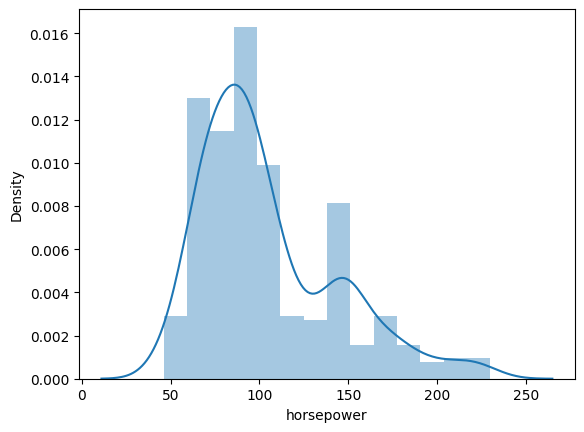

In [72]:
sns.distplot(df['horsepower'])

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_70444/3941653390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'])


<Axes: xlabel='weight', ylabel='Density'>

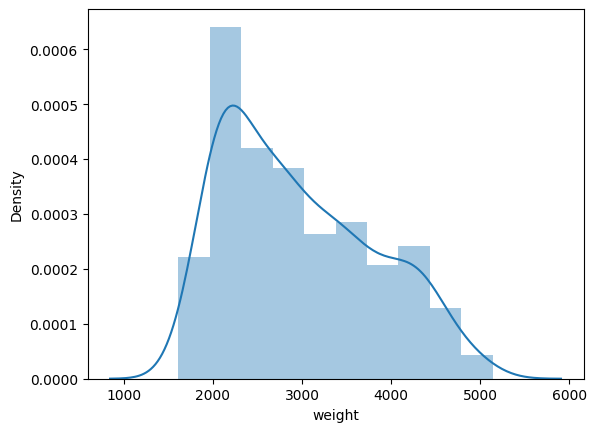

In [73]:
sns.distplot(df['weight'])

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_70444/2933510796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cylinders'])


<Axes: xlabel='cylinders', ylabel='Density'>

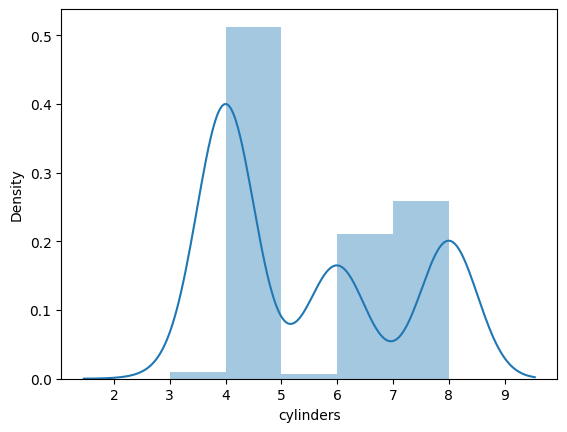

In [74]:
sns.distplot(df['cylinders'])

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_70444/463727065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

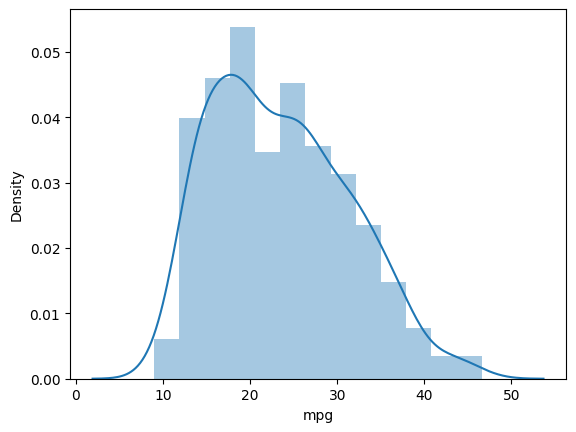

In [75]:
sns.distplot(df['mpg'])

In [71]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
